In [12]:
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import skimage
import xarray as xr
import pandas as pd
from sklearn.cluster import KMeans
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.widgets import Slider
output_notebook()

Loading BokehJS ...

In [2]:
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/indexer.csv"

strain_map_df = pd.read_csv(strain_map_path)
strains = np.concatenate([np.repeat(x.Strain, x.End_Animal - x.Start_Animal + 1) for x in strain_map_df.itertuples()]).flatten()

In [3]:
images_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
imaging_scheme = "TL/470/410/470/410"

raw_images = skimage.io.imread(images_path)
lambdas = imaging_scheme.split("/")
n_animals = raw_images.shape[0] // len(lambdas)

reshaped_images = np.reshape(raw_images,
           (n_animals, len(lambdas), raw_images.shape[1], raw_images.shape[2]))

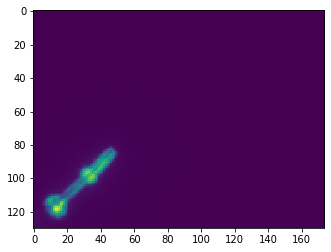

In [4]:
foo = xr.DataArray(reshaped_images,
                   dims=['strain', 'wavelength', 'x', 'y'],
                   coords={'wavelength': lambdas, 'strain': strains})
plt.imshow(foo.sel(wavelength='410', strain='HD233')[0, 1])

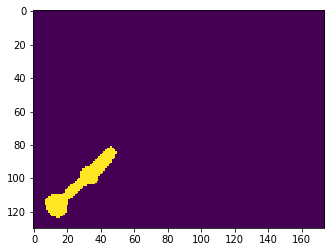

In [5]:
plt.imshow((foo > 2000).data[0,1,:,:])

In [6]:
arr1 = foo.where(foo.wavelength != 'TL', drop=True).data
arr1.shape

(123, 4, 130, 174)

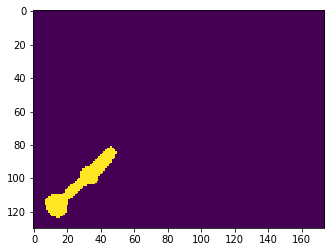

In [7]:
plt.imshow(skimage.measure.label((foo > 2000).data[0,1,:,:]))

In [8]:
arr1.shape

(123, 4, 130, 174)

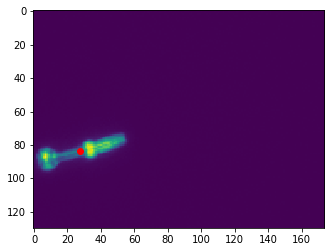

In [9]:
calc_centroids = lambda img: np.asarray(
    skimage.measure.regionprops(np.int_(img))[0].centroid
)
c = np.zeros((arr1.shape[0], arr1.shape[1], 2))
for i in range(arr1.shape[0]):
    for j in range(arr1.shape[1]):
        c[i,j,:] = calc_centroids(arr1[i,j,:,:]>2000)

idx = 3
l = 0
I = arr1[idx,l,:,:]
fig, ax = plt.subplots()
_=ax.imshow(I)
_=ax.scatter(c[idx,l,1], c[idx,l,0], c='r')

In [26]:
# output_file("patch.html")

p = figure(plot_width=400, plot_height=400)

p.image(image=[arr1[idx,l,:,:]], x=[0], y=[0], dw=[10], dh=[10])
show(slider)
slider.on_change("value", lambda x, old, new: print(new))
show(p)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html

